__01. Importing Libraries__

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json
import decimal

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
pip install datapackage

Note: you may need to restart the kernel to use updated packages.


__Importing Json File__

In [4]:
country_geo = r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis/02 Data/Original Data/neighbourhoods.geojson'

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis/02 Data/Original Data/neighbourhoods.geojson')

# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[11.5952, 48.1417], [11.595, 48.1412], [11.5933, 48.1387], [11.5931, 48.1384], [11.5928, 48.1377], [11.5915, 48.136], [11.5909, 48.1355], [11.5892, 48.1343], [11.5886, 48.1335], [11.587, 48.1316], [11.586, 48.1319], [11.5851, 48.1323], [11.5836, 48.133], [11.5828, 48.1339], [11.582, 48.1337], [11.58, 48.1339], [11.5791, 48.1338], [11.5765, 48.1332], [11.5749, 48.1333], [11.573, 48.1321], [11.5716, 48.1314], [11.5706, 48.1308], [11.5685, 48.1312], [11.5676, 48.132], [11.5668, 48.1333], [11.5667, 48.1335], [11.5656, 48.1351], [11.5649, 48.1361], [11.5649, 48.1371], [11.5651, 48.1381], [11.5652, 48.1387], [11.5655, 48.1395], [11.5735, 48.1423], [11.5738, 48.1434], [11.5777, 48.1425], [11.5831, 48.1414], [11.5843, 48.1442], [11.5844, 48.1443], [11.585, 48.1484], [11.5847, 48.1501], [11.5855, 48.1518], [11.5857, 48.1522], [11.588, 48.1531], [11.5892, 48.1566], [11.5916, 48.1565], [11.5933, 48.1534], [11.5935, 48.1527

In [6]:
country_geo

'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis/02 Data/Original Data/neighbourhoods.geojson'

__2.Loading Data Set__

In [7]:
#creating path
path = r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis'

In [8]:
#import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','munich_clean1.csv'))

In [9]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,rental_term,host_type
0,0,0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0,Middle price,Short term,Commercial host
1,1,1,114695,Apartment Munich/East with sundeck,581737,Stephan,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0,Middle price,Short term,Commercial host
2,2,2,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8,Middle price,Short term,Private host
3,3,3,159634,"Fancy, bright central roof top flat and homeof...",765694,Sanna,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0,Low price,Short term,Private host
4,4,4,170154,"Own floor & bath, parking & breakfast",108297,Alex,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18,Low price,Medium term,Private host


In [10]:
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','id','name','host_id','host_name'])

In [11]:
df.shape

(4995, 13)

In [12]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,rental_term,host_type
0,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0,Middle price,Short term,Commercial host
1,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0,Middle price,Short term,Commercial host
2,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8,Middle price,Short term,Private host
3,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0,Low price,Short term,Private host
4,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18,Low price,Medium term,Private host


In [13]:
df['neighbourhood'].value_counts(dropna=False)

Ludwigsvorstadt-Isarvorstadt                              598
Maxvorstadt                                               424
Schwabing-West                                            355
Au-Haidhausen                                             326
Neuhausen-Nymphenburg                                     301
Schwabing-Freimann                                        292
Bogenhausen                                               231
Ramersdorf-Perlach                                        218
Sendling-Westpark                                         189
Milbertshofen-Am Hart                                     181
Sendling                                                  178
Altstadt-Lehel                                            177
Obergiesing                                               172
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    172
Tudering-Riem                                             171
Schwanthalerhöhe                                          155
Laim    

In [16]:
df['neighbourhood'].value_counts(dropna=False)

Ludwigsvorstadt-Isarvorstadt                              598
Maxvorstadt                                               424
Schwabing-West                                            355
Au-Haidhausen                                             326
Neuhausen-Nymphenburg                                     301
Schwabing-Freimann                                        292
Bogenhausen                                               231
Ramersdorf-Perlach                                        218
Sendling-Westpark                                         189
Milbertshofen-Am Hart                                     181
Sendling                                                  178
Altstadt-Lehel                                            177
Obergiesing                                               172
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    172
Tudering-Riem                                             171
Schwanthalerhöhe                                          155
Laim    

__03. Wrangle Data__

In [17]:
# Select only necessary columns for choropleth map
columns = ["neighbourhood", "latitude", "longitude", "room_type", "price"]

In [18]:
df1 = df[columns]

In [19]:
df1.head()

,neighbourhood,latitude,longitude,room_type,price
0,Hadern,48.11492,11.48954,Entire home/apt,80.0
1,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0
2,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0
3,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0
4,Sendling-Westpark,48.10814,11.52733,Private room,55.0


/Users/rayruslijunior/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

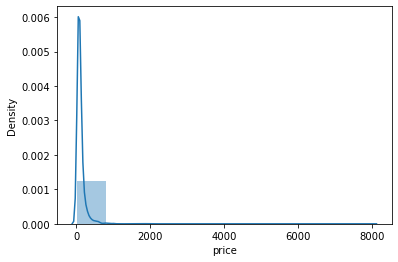

In [20]:
sns.distplot(df1['price'], bins = 10)

__03. Consistency Check__

In [21]:
# Check for missings
df1.isnull().sum()

neighbourhood    0
latitude         0
longitude        0
room_type        0
price            0
dtype: int64

In [22]:
# Check for duplicates
dups = df1.duplicated()

In [23]:
dups.shape
#no duplicate

(4995,)

In [21]:
# Check outliers 
df1.describe()

,latitude,longitude,price
count,4995.000000,4995.000000,4995.000000
mean,48.140613,11.565088,118.425288
std,0.025502,0.047024,220.480379
min,48.068870,11.366801,9.000000
25%,48.123745,11.540435,55.000000
50%,48.137520,11.565530,81.000000
75%,48.157410,11.586970,125.000000
max,48.229500,11.711980,8000.000000


__04. Plotting Chloropleth Map__

In [22]:
data_to_plot = df1[['neighbourhood','price']]
data_to_plot.head()

,neighbourhood,price
0,Hadern,80.0
1,Berg am Laim,95.0
2,Maxvorstadt,99.0
3,Pasing-Obermenzing,52.0
4,Sendling-Westpark,55.0


In [23]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[52.520, 13.404], width=750, height=500)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'price'],
    key_on = 'feature.properties.neighbourhood',
    fill_color = 'PuBuGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "price").add_to(map)
folium.LayerControl().add_to(map)

map

In [24]:
# Export wrangled data set with derived columns
df.to_csv(os.path.join(path, '02 Data','Prepared Data','munich_clean2.csv'))